In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import pandas as pd

import os, sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/')

# Dataset

In [4]:
class MELD(Dataset):
    def __init__(self, mode, csv, device='cpu', pretrained='./Pretrained/'):
        super().__init__()
        self.label = pd.read_csv(csv)['Emotion']
        self.label.reset_index()
        self.video_feature = torch.load(pretrained+f"video_feature_{mode}.pt", map_location=device)
        self.audio_feature = torch.load(pretrained+f"audio_feature_{mode}.pt", map_location=device)
        self.text_feature = torch.load(pretrained+f"text_feature_{mode}.pt", map_location=device)
        self.label_to_index = {'neutral': 0,
                               'surprise': 1,
                               'fear': 2,
                               'sadness': 3,
                               'joy': 4,
                               'disgust': 5,
                               'anger': 6}

    def __getitem__(self, index):
        return self.video_feature[index], self.audio_feature[index], self.text_feature[index], self.label_to_index[self.label[index]]

    def __len__(self):
        return self.video_feature.shape[0]


In [5]:
trainset = MELD('train', './Pretrained/train.csv', device='cuda')
trainloader = DataLoader(trainset, batch_size=8)

validset = MELD('valid', './Pretrained/valid.csv', device='cuda')
validloader = DataLoader(validset, batch_size=8)

testset = MELD('valid', './Pretrained/test.csv', device='cuda')
testloader = DataLoader(testset, batch_size=8)

# Single Modality

### Only Video

In [ ]:
# Only Video
class MELDVideo(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.clf = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.clf(x)
        return x

In [ ]:
device = 'cuda'
EPOCHS = 50
model = MELDVideo(1024, 7).to(device)
optimizer = torch.optim.AdamW(model.parameters())
loss_fn = nn.CrossEntropyLoss()
model.train()
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}")
    acc = 0
    for video, _, _, label in tqdm(trainloader):
        label = label.to(device)
        optimizer.zero_grad()
        yhat = model(video)
        loss = loss_fn(yhat, label)
        loss.backward()
        optimizer.step()
        acc += (yhat.argmax(1)==label).float().sum()
    print(f"Accuracy : {100*acc/len(trainset):.2f}%")
print('\n')

with torch.no_grad():
    print("Validation")
    model.eval()
    acc = 0
    for video, _, _, label in tqdm(validloader):
        label = label.to(device)
        pred = model(video).argmax(1)
        acc += (pred==label).float().sum()
print(f"\nValid Accuracy : {100*acc/len(validset):.2f}%")

Epoch 1


100%|██████████| 790/790 [00:01<00:00, 464.84it/s]


Accuracy : 41.53%
Epoch 2


100%|██████████| 790/790 [00:01<00:00, 748.13it/s]


Accuracy : 43.54%
Epoch 3


100%|██████████| 790/790 [00:01<00:00, 772.77it/s]


Accuracy : 44.97%
Epoch 4


100%|██████████| 790/790 [00:01<00:00, 770.18it/s]


Accuracy : 46.50%
Epoch 5


100%|██████████| 790/790 [00:01<00:00, 783.15it/s]


Accuracy : 47.34%
Epoch 6


100%|██████████| 790/790 [00:00<00:00, 804.40it/s]


Accuracy : 48.26%
Epoch 7


100%|██████████| 790/790 [00:01<00:00, 789.61it/s]


Accuracy : 48.89%
Epoch 8


100%|██████████| 790/790 [00:01<00:00, 779.55it/s]


Accuracy : 49.49%
Epoch 9


100%|██████████| 790/790 [00:00<00:00, 799.62it/s]


Accuracy : 50.08%
Epoch 10


100%|██████████| 790/790 [00:01<00:00, 782.89it/s]


Accuracy : 50.60%
Epoch 11


100%|██████████| 790/790 [00:00<00:00, 794.34it/s]


Accuracy : 51.23%
Epoch 12


100%|██████████| 790/790 [00:01<00:00, 787.57it/s]


Accuracy : 51.44%
Epoch 13


100%|██████████| 790/790 [00:01<00:00, 766.24it/s]


Accuracy : 51.66%
Epoch 14


100%|██████████| 790/790 [00:01<00:00, 767.43it/s]


Accuracy : 51.92%
Epoch 15


100%|██████████| 790/790 [00:01<00:00, 759.94it/s]


Accuracy : 52.17%
Epoch 16


100%|██████████| 790/790 [00:00<00:00, 797.87it/s]


Accuracy : 52.55%
Epoch 17


100%|██████████| 790/790 [00:01<00:00, 788.20it/s]


Accuracy : 52.82%
Epoch 18


100%|██████████| 790/790 [00:00<00:00, 796.48it/s]


Accuracy : 52.96%
Epoch 19


100%|██████████| 790/790 [00:01<00:00, 789.41it/s]


Accuracy : 53.15%
Epoch 20


100%|██████████| 790/790 [00:01<00:00, 786.68it/s]


Accuracy : 53.53%
Epoch 21


100%|██████████| 790/790 [00:01<00:00, 785.95it/s]


Accuracy : 53.67%
Epoch 22


100%|██████████| 790/790 [00:01<00:00, 775.64it/s]


Accuracy : 53.83%
Epoch 23


100%|██████████| 790/790 [00:01<00:00, 768.69it/s]


Accuracy : 54.04%
Epoch 24


100%|██████████| 790/790 [00:00<00:00, 793.03it/s]


Accuracy : 54.18%
Epoch 25


100%|██████████| 790/790 [00:01<00:00, 778.38it/s]


Accuracy : 54.32%
Epoch 26


100%|██████████| 790/790 [00:01<00:00, 749.74it/s]


Accuracy : 54.48%
Epoch 27


100%|██████████| 790/790 [00:01<00:00, 771.20it/s]


Accuracy : 54.65%
Epoch 28


100%|██████████| 790/790 [00:00<00:00, 802.65it/s]


Accuracy : 54.89%
Epoch 29


100%|██████████| 790/790 [00:00<00:00, 803.21it/s]


Accuracy : 55.08%
Epoch 30


100%|██████████| 790/790 [00:01<00:00, 782.33it/s]


Accuracy : 55.24%
Epoch 31


100%|██████████| 790/790 [00:00<00:00, 799.89it/s]


Accuracy : 55.43%
Epoch 32


100%|██████████| 790/790 [00:01<00:00, 763.60it/s]


Accuracy : 55.49%
Epoch 33


100%|██████████| 790/790 [00:01<00:00, 771.81it/s]


Accuracy : 55.51%
Epoch 34


100%|██████████| 790/790 [00:01<00:00, 788.13it/s]


Accuracy : 55.51%
Epoch 35


100%|██████████| 790/790 [00:01<00:00, 774.51it/s]


Accuracy : 55.67%
Epoch 36


100%|██████████| 790/790 [00:01<00:00, 786.96it/s]


Accuracy : 55.81%
Epoch 37


100%|██████████| 790/790 [00:01<00:00, 780.56it/s]


Accuracy : 55.86%
Epoch 38


100%|██████████| 790/790 [00:01<00:00, 778.09it/s]


Accuracy : 55.87%
Epoch 39


100%|██████████| 790/790 [00:01<00:00, 753.63it/s]


Accuracy : 55.98%
Epoch 40


100%|██████████| 790/790 [00:00<00:00, 798.07it/s]


Accuracy : 56.09%
Epoch 41


100%|██████████| 790/790 [00:01<00:00, 776.03it/s]


Accuracy : 56.14%
Epoch 42


100%|██████████| 790/790 [00:01<00:00, 760.45it/s]


Accuracy : 56.22%
Epoch 43


100%|██████████| 790/790 [00:01<00:00, 773.16it/s]


Accuracy : 56.28%
Epoch 44


100%|██████████| 790/790 [00:01<00:00, 772.85it/s]


Accuracy : 56.38%
Epoch 45


100%|██████████| 790/790 [00:01<00:00, 771.08it/s]


Accuracy : 56.44%
Epoch 46


100%|██████████| 790/790 [00:01<00:00, 784.28it/s]


Accuracy : 56.55%
Epoch 47


100%|██████████| 790/790 [00:01<00:00, 779.01it/s]


Accuracy : 56.54%
Epoch 48


100%|██████████| 790/790 [00:00<00:00, 792.64it/s]


Accuracy : 56.65%
Epoch 49


100%|██████████| 790/790 [00:01<00:00, 762.66it/s]


Accuracy : 56.76%
Epoch 50


100%|██████████| 790/790 [00:01<00:00, 750.25it/s]


Accuracy : 56.81%


Validation


100%|██████████| 139/139 [00:00<00:00, 2304.33it/s]


Valid Accuracy : 27.19%


In [ ]:
torch.load('./Pretrained/video_feature_valid.pt').shape

torch.Size([1107, 1024])

In [ ]:
torch.load('./Pretrained/audio_feature_train.pt').shape

torch.Size([6318, 768])

In [ ]:
# t-SNE
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

tsne_v = TSNE().fit_transform(torch.load('./Pretrained/video_feature_train.pt').cpu().numpy())
label = LabelEncoder().fit_transform(trainlabel)

(-98.42307891845704,
 90.03480377197266,
 -102.94985122680664,
 101.24719924926758)

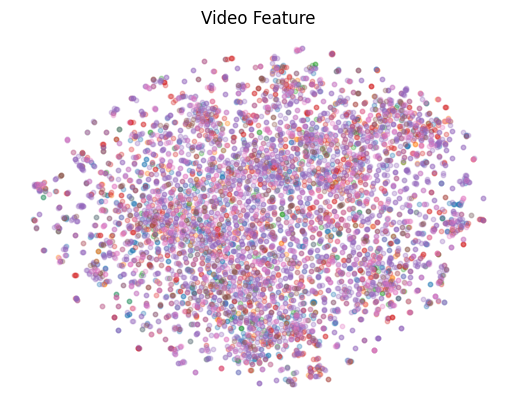

In [ ]:
for lbl in set(label):
    indices = (lbl == label)
    plt.scatter(tsne_v[indices, 0], tsne_v[indices, 1], label=idx_to_lbl[lbl], s=10, alpha=0.3)
#plt.legend(title='Emotion', loc='lower left', bbox_to_anchor=(1.0, 0.5))
plt.title('Video Feature')
plt.axis('off')

In [ ]:
len(tsne_v)

9987

### Only Audio

In [ ]:
# Only Audio
class MELDAudio(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.clf = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.clf(x)
        return x

In [ ]:
device = 'cuda'
EPOCHS = 50
model = MELDAudio(768, 7).to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()
model.train()
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}")
    acc = 0
    for _, audio, _, label in tqdm(trainloader):
        label = label.to(device)
        optimizer.zero_grad()
        yhat = model(audio)
        loss = loss_fn(yhat, label)
        loss.backward()
        optimizer.step()
        acc += (yhat.argmax(1)==label).float().sum()
    print(f"Accuracy : {100*acc/len(trainset):.2f}%")
print('\n')

with torch.no_grad():
    print("Valid")
    model.eval()
    acc = 0
    for _, audio, _, label in tqdm(validloader):
        label = label.to(device)
        pred = model(audio).argmax(1)
        acc += (pred==label).float().sum()
print(f"\nValid Accuracy : {100*acc/len(validset):.2f}%")

Epoch 1


100%|██████████| 790/790 [00:01<00:00, 647.34it/s]


Accuracy : 42.04%
Epoch 2


100%|██████████| 790/790 [00:01<00:00, 763.14it/s]


Accuracy : 43.34%
Epoch 3


100%|██████████| 790/790 [00:01<00:00, 742.34it/s]


Accuracy : 43.65%
Epoch 4


100%|██████████| 790/790 [00:01<00:00, 785.36it/s]


Accuracy : 44.02%
Epoch 5


100%|██████████| 790/790 [00:01<00:00, 776.72it/s]


Accuracy : 44.44%
Epoch 6


100%|██████████| 790/790 [00:01<00:00, 768.95it/s]


Accuracy : 44.92%
Epoch 7


100%|██████████| 790/790 [00:01<00:00, 751.72it/s]


Accuracy : 45.05%
Epoch 8


100%|██████████| 790/790 [00:01<00:00, 754.61it/s]


Accuracy : 45.28%
Epoch 9


100%|██████████| 790/790 [00:00<00:00, 813.01it/s]


Accuracy : 45.36%
Epoch 10


100%|██████████| 790/790 [00:01<00:00, 779.19it/s]


Accuracy : 45.65%
Epoch 11


100%|██████████| 790/790 [00:01<00:00, 774.69it/s]


Accuracy : 45.87%
Epoch 12


100%|██████████| 790/790 [00:01<00:00, 782.35it/s]


Accuracy : 46.19%
Epoch 13


100%|██████████| 790/790 [00:00<00:00, 796.58it/s]


Accuracy : 46.52%
Epoch 14


100%|██████████| 790/790 [00:01<00:00, 787.28it/s]


Accuracy : 46.77%
Epoch 15


100%|██████████| 790/790 [00:01<00:00, 783.48it/s]


Accuracy : 46.88%
Epoch 16


100%|██████████| 790/790 [00:01<00:00, 775.53it/s]


Accuracy : 46.98%
Epoch 17


100%|██████████| 790/790 [00:01<00:00, 781.36it/s]


Accuracy : 47.09%
Epoch 18


100%|██████████| 790/790 [00:01<00:00, 777.39it/s]


Accuracy : 47.37%
Epoch 19


100%|██████████| 790/790 [00:01<00:00, 780.82it/s]


Accuracy : 47.55%
Epoch 20


100%|██████████| 790/790 [00:01<00:00, 757.07it/s]


Accuracy : 47.66%
Epoch 21


100%|██████████| 790/790 [00:01<00:00, 749.79it/s]


Accuracy : 47.78%
Epoch 22


100%|██████████| 790/790 [00:01<00:00, 765.77it/s]


Accuracy : 47.88%
Epoch 23


100%|██████████| 790/790 [00:01<00:00, 788.46it/s]


Accuracy : 48.02%
Epoch 24


100%|██████████| 790/790 [00:01<00:00, 773.11it/s]


Accuracy : 48.12%
Epoch 25


100%|██████████| 790/790 [00:01<00:00, 782.71it/s]


Accuracy : 48.31%
Epoch 26


100%|██████████| 790/790 [00:01<00:00, 743.05it/s]


Accuracy : 48.48%
Epoch 27


100%|██████████| 790/790 [00:01<00:00, 743.27it/s]


Accuracy : 48.53%
Epoch 28


100%|██████████| 790/790 [00:01<00:00, 788.77it/s]


Accuracy : 48.56%
Epoch 29


100%|██████████| 790/790 [00:01<00:00, 785.58it/s]


Accuracy : 48.50%
Epoch 30


100%|██████████| 790/790 [00:01<00:00, 769.13it/s]


Accuracy : 48.54%
Epoch 31


100%|██████████| 790/790 [00:01<00:00, 696.24it/s]


Accuracy : 48.62%
Epoch 32


100%|██████████| 790/790 [00:01<00:00, 758.85it/s]


Accuracy : 48.59%
Epoch 33


100%|██████████| 790/790 [00:01<00:00, 787.77it/s]


Accuracy : 48.80%
Epoch 34


100%|██████████| 790/790 [00:01<00:00, 783.70it/s]


Accuracy : 48.78%
Epoch 35


100%|██████████| 790/790 [00:01<00:00, 775.19it/s]


Accuracy : 48.89%
Epoch 36


100%|██████████| 790/790 [00:00<00:00, 800.92it/s]


Accuracy : 49.02%
Epoch 37


100%|██████████| 790/790 [00:00<00:00, 806.29it/s]


Accuracy : 49.16%
Epoch 38


100%|██████████| 790/790 [00:01<00:00, 771.80it/s]


Accuracy : 49.30%
Epoch 39


100%|██████████| 790/790 [00:01<00:00, 784.08it/s]


Accuracy : 49.40%
Epoch 40


100%|██████████| 790/790 [00:00<00:00, 795.39it/s]


Accuracy : 49.41%
Epoch 41


100%|██████████| 790/790 [00:01<00:00, 782.29it/s]


Accuracy : 49.41%
Epoch 42


100%|██████████| 790/790 [00:01<00:00, 777.71it/s]


Accuracy : 49.46%
Epoch 43


100%|██████████| 790/790 [00:01<00:00, 760.09it/s]


Accuracy : 49.57%
Epoch 44


100%|██████████| 790/790 [00:01<00:00, 772.90it/s]


Accuracy : 49.60%
Epoch 45


100%|██████████| 790/790 [00:00<00:00, 793.84it/s]


Accuracy : 49.65%
Epoch 46


100%|██████████| 790/790 [00:01<00:00, 781.76it/s]


Accuracy : 49.75%
Epoch 47


100%|██████████| 790/790 [00:00<00:00, 792.80it/s]


Accuracy : 49.84%
Epoch 48


100%|██████████| 790/790 [00:01<00:00, 785.76it/s]


Accuracy : 49.92%
Epoch 49


100%|██████████| 790/790 [00:01<00:00, 786.47it/s]


Accuracy : 49.97%
Epoch 50


100%|██████████| 790/790 [00:00<00:00, 800.68it/s]


Accuracy : 50.09%


Valid


100%|██████████| 139/139 [00:00<00:00, 2155.86it/s]


Valid Accuracy : 31.44%


In [ ]:
tsne_a = TSNE().fit_transform(torch.load('./Pretrained/audio_feature_train.pt').cpu().numpy())
label = LabelEncoder().fit_transform(trainlabel)

(-73.95099411010742, 79.72685775756835, -64.29569206237792, 69.93531761169433)

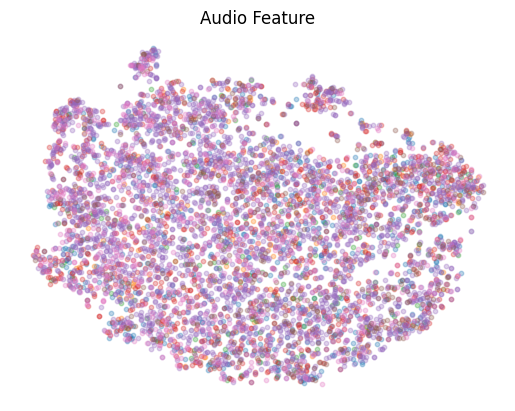

In [ ]:
for lbl in set(label):
    indices = (lbl == label)
    plt.scatter(tsne_a[indices, 0], tsne_a[indices, 1], label=idx_to_lbl[lbl], s=10, alpha=0.3)
#plt.legend(title='Emotion', loc='lower left', bbox_to_anchor=(1.0, 0.5))
plt.title('Audio Feature')
plt.axis('off')

### Only Text

In [ ]:
# Only Text
class MELDText(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.clf = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.clf(x)
        return x

In [ ]:
device = 'cuda'
EPOCHS = 50
model = MELDText(768, 7).to(device)
optimizer = torch.optim.AdamW(model.parameters())
loss_fn = nn.CrossEntropyLoss()
model.train()
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}")
    acc = 0
    for _, _, text, label in tqdm(trainloader):
        label = label.to(device)
        optimizer.zero_grad()
        yhat = model(text)
        loss = loss_fn(yhat, label)
        loss.backward()
        optimizer.step()
        acc += (yhat.argmax(1)==label).float().sum()
    print(f"Accuracy : {100*acc/len(trainset):.2f}%")
print('\n')

with torch.no_grad():
    print("Valid")
    model.eval()
    acc = 0
    for _, _, text, label in tqdm(validloader):
        label = label.to(device)
        pred = model(text).argmax(1)
        acc += (pred==label).float().sum()
print(f"\nValid Accuracy : {100*acc/len(validset):.2f}%")

Epoch 1


100%|██████████| 790/790 [00:01<00:00, 745.66it/s]


Accuracy : 44.44%
Epoch 2


100%|██████████| 790/790 [00:01<00:00, 759.88it/s]


Accuracy : 44.37%
Epoch 3


100%|██████████| 790/790 [00:01<00:00, 758.53it/s]


Accuracy : 44.38%
Epoch 4


100%|██████████| 790/790 [00:01<00:00, 755.78it/s]


Accuracy : 44.41%
Epoch 5


100%|██████████| 790/790 [00:01<00:00, 771.91it/s]


Accuracy : 44.41%
Epoch 6


100%|██████████| 790/790 [00:01<00:00, 782.23it/s]


Accuracy : 44.46%
Epoch 7


100%|██████████| 790/790 [00:01<00:00, 789.16it/s]


Accuracy : 44.51%
Epoch 8


100%|██████████| 790/790 [00:01<00:00, 787.99it/s]


Accuracy : 44.54%
Epoch 9


100%|██████████| 790/790 [00:00<00:00, 790.66it/s]


Accuracy : 44.54%
Epoch 10


100%|██████████| 790/790 [00:00<00:00, 792.04it/s]


Accuracy : 44.52%
Epoch 11


100%|██████████| 790/790 [00:01<00:00, 780.04it/s]


Accuracy : 44.52%
Epoch 12


100%|██████████| 790/790 [00:01<00:00, 789.35it/s]


Accuracy : 44.54%
Epoch 13


100%|██████████| 790/790 [00:01<00:00, 745.80it/s]


Accuracy : 44.57%
Epoch 14


100%|██████████| 790/790 [00:01<00:00, 770.52it/s]


Accuracy : 44.54%
Epoch 15


100%|██████████| 790/790 [00:01<00:00, 765.12it/s]


Accuracy : 44.52%
Epoch 16


100%|██████████| 790/790 [00:01<00:00, 743.46it/s]


Accuracy : 44.52%
Epoch 17


100%|██████████| 790/790 [00:01<00:00, 770.63it/s]


Accuracy : 44.52%
Epoch 18


100%|██████████| 790/790 [00:01<00:00, 725.65it/s]


Accuracy : 44.54%
Epoch 19


100%|██████████| 790/790 [00:01<00:00, 769.10it/s]


Accuracy : 44.49%
Epoch 20


100%|██████████| 790/790 [00:01<00:00, 772.85it/s]


Accuracy : 44.51%
Epoch 21


100%|██████████| 790/790 [00:01<00:00, 723.97it/s]


Accuracy : 44.48%
Epoch 22


100%|██████████| 790/790 [00:01<00:00, 773.22it/s]


Accuracy : 44.46%
Epoch 23


100%|██████████| 790/790 [00:01<00:00, 785.82it/s]


Accuracy : 44.51%
Epoch 24


100%|██████████| 790/790 [00:00<00:00, 793.48it/s]


Accuracy : 44.52%
Epoch 25


100%|██████████| 790/790 [00:01<00:00, 787.07it/s]


Accuracy : 44.51%
Epoch 26


100%|██████████| 790/790 [00:01<00:00, 763.18it/s]


Accuracy : 44.57%
Epoch 27


100%|██████████| 790/790 [00:01<00:00, 784.48it/s]


Accuracy : 44.57%
Epoch 28


100%|██████████| 790/790 [00:01<00:00, 771.39it/s]


Accuracy : 44.57%
Epoch 29


100%|██████████| 790/790 [00:01<00:00, 775.77it/s]


Accuracy : 44.54%
Epoch 30


100%|██████████| 790/790 [00:01<00:00, 788.56it/s]


Accuracy : 44.56%
Epoch 31


100%|██████████| 790/790 [00:01<00:00, 737.72it/s]


Accuracy : 44.60%
Epoch 32


100%|██████████| 790/790 [00:01<00:00, 756.22it/s]


Accuracy : 44.60%
Epoch 33


100%|██████████| 790/790 [00:01<00:00, 766.64it/s]


Accuracy : 44.59%
Epoch 34


100%|██████████| 790/790 [00:01<00:00, 738.98it/s]


Accuracy : 44.62%
Epoch 35


100%|██████████| 790/790 [00:01<00:00, 785.41it/s]


Accuracy : 44.62%
Epoch 36


100%|██████████| 790/790 [00:01<00:00, 783.01it/s]


Accuracy : 44.65%
Epoch 37


100%|██████████| 790/790 [00:01<00:00, 783.82it/s]


Accuracy : 44.65%
Epoch 38


100%|██████████| 790/790 [00:01<00:00, 774.63it/s]


Accuracy : 44.63%
Epoch 39


100%|██████████| 790/790 [00:01<00:00, 767.58it/s]


Accuracy : 44.62%
Epoch 40


100%|██████████| 790/790 [00:01<00:00, 738.79it/s]


Accuracy : 44.59%
Epoch 41


100%|██████████| 790/790 [00:01<00:00, 779.49it/s]


Accuracy : 44.60%
Epoch 42


100%|██████████| 790/790 [00:01<00:00, 780.77it/s]


Accuracy : 44.62%
Epoch 43


100%|██████████| 790/790 [00:01<00:00, 766.99it/s]


Accuracy : 44.63%
Epoch 44


100%|██████████| 790/790 [00:01<00:00, 772.84it/s]


Accuracy : 44.63%
Epoch 45


100%|██████████| 790/790 [00:01<00:00, 772.76it/s]


Accuracy : 44.63%
Epoch 46


100%|██████████| 790/790 [00:01<00:00, 779.76it/s]


Accuracy : 44.60%
Epoch 47


100%|██████████| 790/790 [00:01<00:00, 778.19it/s]


Accuracy : 44.62%
Epoch 48


100%|██████████| 790/790 [00:01<00:00, 784.65it/s]


Accuracy : 44.62%
Epoch 49


100%|██████████| 790/790 [00:01<00:00, 774.02it/s]


Accuracy : 44.62%
Epoch 50


100%|██████████| 790/790 [00:01<00:00, 768.00it/s]


Accuracy : 44.63%


Valid


100%|██████████| 139/139 [00:00<00:00, 2078.97it/s]


Valid Accuracy : 36.50%


In [ ]:
tsne_t = TSNE().fit_transform(torch.load('./Pretrained/text_feature_train.pt').cpu().numpy())
label = LabelEncoder().fit_transform(trainlabel)
for lbl in set(label):
    indices = (lbl == label)
    plt.scatter(tsne_t[indices, 0], tsne_t[indices, 1], label=idx_to_lbl[lbl], s=10, alpha=0.3)
plt.legend(title='Emotion', loc='lower left', bbox_to_anchor=(1.0, 0.5))
plt.title('Text Feature')
plt.axis('off')

In [ ]:
len(tsne_t)

9987

# All Modality

### Just Concatenating

In [ ]:
# Just Concatenate
class MELDVanilla(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.clf = nn.Linear(input_dim, output_dim)

    def forward(self, video, audio, text):
        feature = torch.concat([video, audio, text], dim=1)
        out = self.clf(feature)
        return out

In [ ]:
device = 'cuda'
EPOCHS = 50
model = MELDVanilla(768+768+1024, 7).to(device)
optimizer = torch.optim.AdamW(model.parameters())
loss_fn = nn.CrossEntropyLoss()
model.train()
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}")
    acc = 0
    for video, audio, text, label in tqdm(trainloader):
        label = label.to(device)
        optimizer.zero_grad()
        yhat = model(video, audio, text)
        loss = loss_fn(yhat, label)
        loss.backward()
        optimizer.step()
        acc += (yhat.argmax(1)==label).float().sum()
    print(f"Accuracy : {100*acc/len(trainset):.2f}%")
print('\n')

with torch.no_grad():
    model.eval()
    acc = 0
    for video, audio, text, label in tqdm(validloader):
        label = label.to(device)
        pred = model(video, audio, text).argmax(1)
        acc += (pred==label).float().sum()
    print(f"Valid Accuracy : {100*acc/len(validset):.2f}%")

Epoch 1


100%|██████████| 1249/1249 [00:01<00:00, 732.87it/s]


Accuracy : 37.50%
Epoch 2


100%|██████████| 1249/1249 [00:01<00:00, 733.88it/s]


Accuracy : 40.57%
Epoch 3


100%|██████████| 1249/1249 [00:01<00:00, 709.91it/s]


Accuracy : 42.91%
Epoch 4


100%|██████████| 1249/1249 [00:01<00:00, 735.56it/s]


Accuracy : 44.80%
Epoch 5


100%|██████████| 1249/1249 [00:01<00:00, 727.83it/s]


Accuracy : 46.07%
Epoch 6


100%|██████████| 1249/1249 [00:01<00:00, 736.37it/s]


Accuracy : 47.13%
Epoch 7


100%|██████████| 1249/1249 [00:01<00:00, 743.57it/s]


Accuracy : 48.15%
Epoch 8


100%|██████████| 1249/1249 [00:01<00:00, 745.60it/s]


Accuracy : 49.11%
Epoch 9


100%|██████████| 1249/1249 [00:01<00:00, 742.17it/s]


Accuracy : 49.96%
Epoch 10


100%|██████████| 1249/1249 [00:01<00:00, 727.72it/s]


Accuracy : 50.74%
Epoch 11


100%|██████████| 1249/1249 [00:01<00:00, 740.32it/s]


Accuracy : 51.25%
Epoch 12


100%|██████████| 1249/1249 [00:01<00:00, 737.94it/s]


Accuracy : 51.76%
Epoch 13


100%|██████████| 1249/1249 [00:01<00:00, 740.82it/s]


Accuracy : 52.42%
Epoch 14


100%|██████████| 1249/1249 [00:01<00:00, 704.27it/s]


Accuracy : 52.98%
Epoch 15


100%|██████████| 1249/1249 [00:01<00:00, 723.05it/s]


Accuracy : 53.53%
Epoch 16


100%|██████████| 1249/1249 [00:01<00:00, 743.59it/s]


Accuracy : 53.93%
Epoch 17


100%|██████████| 1249/1249 [00:01<00:00, 725.23it/s]


Accuracy : 54.34%
Epoch 18


100%|██████████| 1249/1249 [00:01<00:00, 720.34it/s]


Accuracy : 54.68%
Epoch 19


100%|██████████| 1249/1249 [00:01<00:00, 738.71it/s]


Accuracy : 55.03%
Epoch 20


100%|██████████| 1249/1249 [00:01<00:00, 738.46it/s]


Accuracy : 55.34%
Epoch 21


100%|██████████| 1249/1249 [00:01<00:00, 742.81it/s]


Accuracy : 55.74%
Epoch 22


100%|██████████| 1249/1249 [00:01<00:00, 752.46it/s]


Accuracy : 56.05%
Epoch 23


100%|██████████| 1249/1249 [00:01<00:00, 745.04it/s]


Accuracy : 56.36%
Epoch 24


100%|██████████| 1249/1249 [00:01<00:00, 732.74it/s]


Accuracy : 56.59%
Epoch 25


100%|██████████| 1249/1249 [00:01<00:00, 722.42it/s]


Accuracy : 56.94%
Epoch 26


100%|██████████| 1249/1249 [00:01<00:00, 737.21it/s]


Accuracy : 57.17%
Epoch 27


100%|██████████| 1249/1249 [00:01<00:00, 734.87it/s]


Accuracy : 57.41%
Epoch 28


100%|██████████| 1249/1249 [00:01<00:00, 738.30it/s]


Accuracy : 57.78%
Epoch 29


100%|██████████| 1249/1249 [00:01<00:00, 744.34it/s]


Accuracy : 57.93%
Epoch 30


100%|██████████| 1249/1249 [00:01<00:00, 739.86it/s]


Accuracy : 58.12%
Epoch 31


100%|██████████| 1249/1249 [00:01<00:00, 735.03it/s]


Accuracy : 58.52%
Epoch 32


100%|██████████| 1249/1249 [00:01<00:00, 724.99it/s]


Accuracy : 58.79%
Epoch 33


100%|██████████| 1249/1249 [00:01<00:00, 741.30it/s]


Accuracy : 59.05%
Epoch 34


100%|██████████| 1249/1249 [00:01<00:00, 728.73it/s]


Accuracy : 59.24%
Epoch 35


100%|██████████| 1249/1249 [00:01<00:00, 723.03it/s]


Accuracy : 59.48%
Epoch 36


100%|██████████| 1249/1249 [00:01<00:00, 742.15it/s]


Accuracy : 59.68%
Epoch 37


100%|██████████| 1249/1249 [00:01<00:00, 754.21it/s]


Accuracy : 59.85%
Epoch 38


100%|██████████| 1249/1249 [00:01<00:00, 727.20it/s]


Accuracy : 59.97%
Epoch 39


100%|██████████| 1249/1249 [00:01<00:00, 721.07it/s]


Accuracy : 60.21%
Epoch 40


100%|██████████| 1249/1249 [00:01<00:00, 737.39it/s]


Accuracy : 60.41%
Epoch 41


100%|██████████| 1249/1249 [00:01<00:00, 740.65it/s]


Accuracy : 60.54%
Epoch 42


100%|██████████| 1249/1249 [00:01<00:00, 744.01it/s]


Accuracy : 60.73%
Epoch 43


100%|██████████| 1249/1249 [00:01<00:00, 739.30it/s]


Accuracy : 60.87%
Epoch 44


100%|██████████| 1249/1249 [00:01<00:00, 736.08it/s]


Accuracy : 61.01%
Epoch 45


100%|██████████| 1249/1249 [00:01<00:00, 750.92it/s]


Accuracy : 61.13%
Epoch 46


100%|██████████| 1249/1249 [00:01<00:00, 720.06it/s]


Accuracy : 61.25%
Epoch 47


100%|██████████| 1249/1249 [00:01<00:00, 730.32it/s]


Accuracy : 61.40%
Epoch 48


100%|██████████| 1249/1249 [00:01<00:00, 756.42it/s]


Accuracy : 61.55%
Epoch 49


100%|██████████| 1249/1249 [00:01<00:00, 734.30it/s]


Accuracy : 61.64%
Epoch 50


100%|██████████| 1249/1249 [00:01<00:00, 757.09it/s]


Accuracy : 61.75%




100%|██████████| 139/139 [00:00<00:00, 2078.02it/s]

Valid Accuracy : 40.58%


### Fusion

In [7]:
import torch
import torch.nn.functional as F

def contrastive_loss(h, mode, tau=0.5):
    B, D = h.shape
    positive_mask = torch.eye(D, dtype=torch.bool).cuda()
    if mode == 'modality':
        positive_mask = torch.zeros_like(positive_mask).cuda()
        for row in range(D):
            positive_mask[row, (row % 3)::3] = 1
    elif mode == 'utterance':
        positive_mask = torch.zeros_like(positive_mask)
        for i in range(D // 3):
            positive_mask[i * 3:(i + 1) * 3, i * 3:(i + 1) * 3] = 1
    loss = 0
    for b in range(B):
        ht = h[b].view(1, -1)
        similarity = F.cosine_similarity(ht, ht.T)
        positive_similarity = similarity * positive_mask
        negative_mask = ~positive_mask
        negative_mask[torch.eye(D, dtype=torch.bool)] = 0
        negative_similarity = similarity * negative_mask
        positive_logsumexp = torch.logsumexp(positive_similarity[positive_mask], dim=0)
        negative_logsumexp = torch.logsumexp(negative_similarity[negative_mask], dim=0)
        loss -= positive_logsumexp
        loss += negative_logsumexp
    return loss

In [28]:
###################
# DDM+CFM Version #
###################
class MELDFF(nn.Module):
    def __init__(self):
        # Feature Extractor
        super().__init__()
        self.device = 'cuda'
        # Modality and Utterance encoder
        self.video_me = nn.Linear(1024, 512)
        self.video_ue = nn.Linear(1024, 512)
        self.audio_me = nn.Linear(768, 512)
        self.audio_ue = nn.Linear(768, 512)
        self.text_me = nn.Linear(768, 512)
        self.text_ue = nn.Linear(768, 512)
        # Weight
        self.Wv = nn.Linear(1024, 1)
        self.Wa = nn.Linear(1024, 1)
        self.Wt = nn.Linear(1024, 1)
        # Classifier
        self.clf = nn.Linear(512*3*2, 7)

    def forward(self, fv, fa, ft):
        loss = 0
        # Extract video feature, map and encode
        fv_m = self.video_me(fv)
        fv_u = self.video_ue(fv)
        # Extract audio feature and encode
        fa_m = self.audio_me(fa)
        fa_u = self.audio_ue(fa)
        # Extract text feature and encode
        ft_m = self.text_me(ft)
        ft_u = self.text_ue(ft)

        ############ DDM ############
        # Contrastive Learning: Prepare
        B = ft.shape[0]
        f_modality = torch.empty(B, 512*3).to(self.device)
        f_modality[:, 0::3] = fv_m
        f_modality[:, 1::3] = fa_m
        f_modality[:, 2::3] = ft_m
        f_utterance = torch.empty(B, 512*3).to(self.device)
        f_utterance[:, 0::3] = fv_u
        f_utterance[:, 1::3] = fa_u
        f_utterance[:, 2::3] = ft_u
        if self.training:
            # Contrastive Learning: Modality
            loss += contrastive_loss(f_modality, 'modality').sum()
            # Contrastive Learning: Utterance
            loss += contrastive_loss(f_utterance, 'utterance').sum()

        # Weight
        h = torch.concat([f_modality, f_utterance], dim=1)

        ############ Classifier ############
        output = self.clf(h)
        if self.training:
            return output, loss.to(self.device)
        else:
            return output

In [29]:
trainset = MELD('train', './Pretrained/train.csv', device='cuda')
trainloader = DataLoader(trainset, batch_size=8)

validset = MELD('valid', './Pretrained/valid.csv', device='cuda')
validloader = DataLoader(validset, batch_size=8)

testset = MELD('test', './Pretrained/test.csv', device='cuda')
testloader = DataLoader(testset, batch_size=8)

# Model
device = 'cuda'
epochs = 30
history_train = {'accuracy':[], 'loss':[]}
model = MELDFF().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# Train
model.train()
for epoch in range(epochs):
    loss_tmp = 0
    acc_tmp = 0
    for video, audio, text, label in tqdm(trainloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        optimizer.zero_grad()
        yhat, loss = model(video, audio, text)
        loss += loss_fn(yhat, label)
        loss.backward()
        optimizer.step()
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
    print(f"Epoch {epoch+1} Summary:\nTrain Accuracy {100*acc_tmp/len(trainset):.2f}%, Avg Loss {loss_tmp/len(trainset):.2f}\n")
    history_train['accuracy'].append(100*acc_tmp/len(trainset))
    history_train['loss'].append(loss_tmp/len(trainset))
torch.save(model.state_dict(), f'model_FF.pt')
# Valid
with torch.no_grad():
    model.eval()
    loss_tmp = 0
    acc_tmp = 0
    for video, audio, text, label in tqdm(validloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        yhat = model(video, audio, text)
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
    print(f"\nValid Accuracy {100*acc_tmp/len(validset):.2f}%, Avg Loss {loss_tmp/len(validset):.2f}\n")

100%|██████████| 1249/1249 [02:58<00:00,  6.98it/s]


Epoch 1 Summary:
Train Accuracy 43.36%, Avg Loss 7.13



100%|██████████| 1249/1249 [02:56<00:00,  7.08it/s]


Epoch 2 Summary:
Train Accuracy 46.74%, Avg Loss 7.12



100%|██████████| 1249/1249 [02:56<00:00,  7.09it/s]


Epoch 3 Summary:
Train Accuracy 47.61%, Avg Loss 7.11



100%|██████████| 1249/1249 [02:55<00:00,  7.11it/s]


Epoch 4 Summary:
Train Accuracy 47.90%, Avg Loss 7.11



100%|██████████| 1249/1249 [02:54<00:00,  7.15it/s]


Epoch 5 Summary:
Train Accuracy 48.45%, Avg Loss 7.11



100%|██████████| 1249/1249 [02:57<00:00,  7.05it/s]


Epoch 6 Summary:
Train Accuracy 49.18%, Avg Loss 7.10



100%|██████████| 1249/1249 [02:57<00:00,  7.03it/s]


Epoch 7 Summary:
Train Accuracy 50.23%, Avg Loss 7.10



100%|██████████| 1249/1249 [02:57<00:00,  7.03it/s]


Epoch 8 Summary:
Train Accuracy 51.42%, Avg Loss 7.09



100%|██████████| 1249/1249 [02:57<00:00,  7.04it/s]


Epoch 9 Summary:
Train Accuracy 52.73%, Avg Loss 7.09



100%|██████████| 1249/1249 [02:56<00:00,  7.06it/s]


Epoch 10 Summary:
Train Accuracy 53.64%, Avg Loss 7.09



100%|██████████| 1249/1249 [02:56<00:00,  7.09it/s]


Epoch 11 Summary:
Train Accuracy 54.39%, Avg Loss 7.08



100%|██████████| 1249/1249 [02:53<00:00,  7.18it/s]


Epoch 12 Summary:
Train Accuracy 55.14%, Avg Loss 7.08



100%|██████████| 1249/1249 [02:53<00:00,  7.19it/s]


Epoch 13 Summary:
Train Accuracy 55.97%, Avg Loss 7.08



100%|██████████| 1249/1249 [02:53<00:00,  7.19it/s]


Epoch 14 Summary:
Train Accuracy 56.62%, Avg Loss 7.08



100%|██████████| 1249/1249 [02:54<00:00,  7.17it/s]


Epoch 15 Summary:
Train Accuracy 57.11%, Avg Loss 7.08



100%|██████████| 1249/1249 [02:54<00:00,  7.18it/s]


Epoch 16 Summary:
Train Accuracy 57.67%, Avg Loss 7.07



100%|██████████| 1249/1249 [02:55<00:00,  7.11it/s]


Epoch 17 Summary:
Train Accuracy 58.13%, Avg Loss 7.07



100%|██████████| 1249/1249 [02:55<00:00,  7.11it/s]


Epoch 18 Summary:
Train Accuracy 58.78%, Avg Loss 7.07



100%|██████████| 1249/1249 [02:55<00:00,  7.13it/s]


Epoch 19 Summary:
Train Accuracy 59.33%, Avg Loss 7.07



100%|██████████| 1249/1249 [02:55<00:00,  7.11it/s]


Epoch 20 Summary:
Train Accuracy 59.63%, Avg Loss 7.07



100%|██████████| 1249/1249 [02:53<00:00,  7.19it/s]


Epoch 21 Summary:
Train Accuracy 59.96%, Avg Loss 7.07



100%|██████████| 1249/1249 [02:53<00:00,  7.18it/s]


Epoch 22 Summary:
Train Accuracy 60.39%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:53<00:00,  7.19it/s]


Epoch 23 Summary:
Train Accuracy 60.92%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:54<00:00,  7.17it/s]


Epoch 24 Summary:
Train Accuracy 61.30%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:54<00:00,  7.18it/s]


Epoch 25 Summary:
Train Accuracy 61.71%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:54<00:00,  7.17it/s]


Epoch 26 Summary:
Train Accuracy 62.09%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:53<00:00,  7.18it/s]


Epoch 27 Summary:
Train Accuracy 62.57%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:54<00:00,  7.14it/s]


Epoch 28 Summary:
Train Accuracy 62.94%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:54<00:00,  7.17it/s]


Epoch 29 Summary:
Train Accuracy 63.36%, Avg Loss 7.06



100%|██████████| 1249/1249 [02:54<00:00,  7.15it/s]


Epoch 30 Summary:
Train Accuracy 63.79%, Avg Loss 7.06



100%|██████████| 139/139 [00:00<00:00, 978.30it/s]


Valid Accuracy 42.02%, Avg Loss 4.39



In [31]:
model = MELDFF().to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/meldff.pt'))

<All keys matched successfully>

In [32]:
# Test
with torch.no_grad():
    preds = []
    labels = []
    model.eval()
    loss_tmp = 0
    acc_tmp = 0
    for video, audio, text, label in tqdm(testloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        yhat = model(video, audio, text)
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
        preds.extend(yhat.argmax(1).cpu().numpy())
        labels.extend(label.cpu().numpy())
    weighted_f1 = f1_score(labels, preds, average='weighted')
    print(f"\nTest Accuracy {100*acc_tmp/len(testset):.2f}%, Avg Loss {loss_tmp/len(testset):.2f}\n")
    print(f"Weighted F1 Score: {weighted_f1:.4f}")

100%|██████████| 327/327 [00:00<00:00, 894.77it/s]


Test Accuracy 46.82%, Avg Loss 4.38

Weighted F1 Score: 0.3622


In [ ]:
import matplotlib.pyplot as plt
# Function to plot accuracy and loss
def plot_history(history):
    epochs = range(1, len(history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], label='Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the updated history
plot_history(history_train)


In [11]:
# Valid
with torch.no_grad():
    model.eval()
    loss_tmp = 0
    acc_tmp = 0
    for video, audio, text, label in tqdm(validloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        yhat = model(video, audio, text)
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
    print(f"\nValid Accuracy {100*acc_tmp/len(trainset):.2f}%, Avg Loss {loss_tmp/len(trainset):.2f}\n")

  0%|          | 0/139 [00:00<?, ?it/s]


UnboundLocalError: local variable 'f_modality' referenced before assignment

In [21]:
testset = MELD('test', './Pretrained/test.csv', device='cuda')
testloader = DataLoader(testset, batch_size=8)

In [25]:
# Test
from sklearn.metrics import f1_score
with torch.no_grad():
    all_labels = []
    all_preds = []
    melff.eval()
    acc_tmp = 0
    for video, audio, text, label in tqdm(testloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        yhat = melff(video, audio, text)
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
    weighted_f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"\nTest Accuracy {100*acc_tmp/len(testset):.2f}%\n")
    print(f"Weighted F1 Score: {weighted_f1:.4f}\n")

100%|██████████| 327/327 [00:00<00:00, 981.46it/s]


Test Accuracy 46.82%

Weighted F1 Score: 0.0000



In [ ]:
# Model
device = 'cuda'
epochs = 10
history_train = {'accuracy':[], 'loss':[]}
model = MELDA().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# Train
model.train()
for epoch in range(epochs):
    loss_tmp = 0
    acc_tmp = 0
    model.train()
    for video, audio, text, label in tqdm(trainloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        optimizer.zero_grad()
        yhat = model(video, audio, text)
        loss = loss_fn(yhat, label)
        loss.backward()
        optimizer.step()
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
    model.eval()
    loss_tmp = 0
    acc_tmp = 0
    for video, audio, text, label in tqdm(validloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        yhat = model(video, audio, text)
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
    print(f"Epoch {epoch+1} Summary:\nTrain Accuracy {100*acc_tmp/len(trainset):.2f}%, Avg Loss {loss_tmp/len(trainset):.2f}\n")
    print(f"\nValid Accuracy {100*acc_tmp/len(trainset):.2f}%")
# Valid
with torch.no_grad():
    model.eval()
    loss_tmp = 0
    acc_tmp = 0
    for video, audio, text, label in tqdm(validloader):
        video, audio, text, label = video.to(device), audio.to(device), text.to(device), label.to(device)
        yhat = model(video, audio, text)
        loss_tmp += loss.item()
        acc_tmp += (yhat.argmax(1) == label).type(torch.float).sum().item()
    print(f"\nValid Accuracy {100*acc_tmp/len(trainset):.2f}%, Avg Loss {loss_tmp/len(trainset):.2f}\n")

100%|██████████| 1249/1249 [00:05<00:00, 221.40it/s]


Epoch 1 Summary:
Train Accuracy 47.08%, Avg Loss 0.19



100%|██████████| 1249/1249 [00:05<00:00, 221.75it/s]


Epoch 2 Summary:
Train Accuracy 47.16%, Avg Loss 0.19



100%|██████████| 1249/1249 [00:05<00:00, 224.29it/s]


Epoch 3 Summary:
Train Accuracy 47.21%, Avg Loss 0.19



100%|██████████| 1249/1249 [00:05<00:00, 223.42it/s]


Epoch 4 Summary:
Train Accuracy 47.23%, Avg Loss 0.19



100%|██████████| 1249/1249 [00:05<00:00, 225.31it/s]


Epoch 5 Summary:
Train Accuracy 47.34%, Avg Loss 0.19



100%|██████████| 1249/1249 [00:05<00:00, 215.44it/s]


Epoch 6 Summary:
Train Accuracy 47.55%, Avg Loss 0.19



100%|██████████| 1249/1249 [00:05<00:00, 220.25it/s]


Epoch 7 Summary:
Train Accuracy 47.53%, Avg Loss 0.18



100%|██████████| 1249/1249 [00:05<00:00, 220.77it/s]


Epoch 8 Summary:
Train Accuracy 47.62%, Avg Loss 0.18



100%|██████████| 1249/1249 [00:05<00:00, 221.36it/s]


Epoch 9 Summary:
Train Accuracy 47.97%, Avg Loss 0.18



100%|██████████| 1249/1249 [00:05<00:00, 221.71it/s]


Epoch 10 Summary:
Train Accuracy 47.99%, Avg Loss 0.18



100%|██████████| 139/139 [00:00<00:00, 952.30it/s]


Valid Accuracy 4.72%, Avg Loss 0.02



### Using CLIP

In [ ]:
from transformers import AutoTokenizer, CLIPTextModel

CLIP = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
CLIPtokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

def text_template(emotions, b, tidx=0):
    templates = ["A person speaking with {} emotion"
                 "A dialogue filled with {} emotion",
                 "A conversation marked by {} emotion",
                 "An exchange showing {} emotion",
                 "A chat displaying {} emotion",
                 "A discussion with {} emotion",
                 "A talk expressing {} emotion",
                 "A dialogue featuring {} emotion",
                 "An interaction showing {} emotion",
                 "A verbal exchange filled with {} emotion",
                 "A conversation highlighting {} emotion",
                 "A discussion reflecting {} emotion",
                 "A talk infused with {} emotion",
                 "An exchange characterized by {} emotion",
                 "A dialogue manifesting {} emotion",
                 "A conversation underscored by {} emotion",
                 "An interaction marked by {} emotion",
                 "A chat marked by {} emotion",
                 "A discussion imbued with {} emotion",
                 "A talk permeated by {} emotion",
                 "A verbal interaction expressing {} emotion",
                 "An exchange that conveys {} emotion",
                 "A dialogue that demonstrates {} emotion",
                 "A conversation where {} emotion is evident",
                 "A discussion where {} emotion is apparent"]
    texts = []
    for _ in range(b):
        tmp = []
        for e in emotions:
            tmp.append(templates[tidx].replace('{}', e))
        texts.append(tmp)
    batch = [" ".join(t) for t in texts]
    tokenized = CLIPtokenizer(batch, padding=True, truncation=True, return_tensors='pt')
    return tokenized['input_ids']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# Using CLIP
class MELDCLIP(nn.Module):
    def __init__(self):
        super().__init__()
        self.video_projection = nn.Linear(1024, 768)
        self.proj = nn.Linear(768, 512)

    def forward(self, video, audio, text):
        video = self.video_projection(video)
        feature = torch.concat([video, audio, text], dim=1)
        feature = self.proj(feature)
        return feature

In [ ]:
device = 'cuda'
labels = ['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust', 'anger']
tokenized = text_template(labels, 1)
CLIPEmotion = CLIP(tokenized).last_hidden_state.mean(dim=1).to(device)
EPOCHS = 100
model = MELDCLIP().to(device)
optimizer = torch.optim.AdamW(model.parameters())
loss_fn = nn.CrossEntropyLoss()
model.train()
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}")
    acc = 0
    for video, audio, text, label in tqdm(trainloader):
        label = label.to(device)
        optimizer.zero_grad()
        yhat = model(video, audio, text)
        try:
            sim = F.cosine_similarity(yhat, CLIPEmotion)
        except:
            continue
        loss = loss_fn(sim, label)
        loss.backward()
        optimizer.step()
        acc += (yhat.argmax(1)==label).float().sum()
    print(f"Accuracy : {100*acc/len(trainset):.2f}%")
print('\n')

with torch.no_grad():
    model.eval()
    acc = 0
    for video, audio, text, label in tqdm(validloader):
        label = label.to(device)
        yhat = model(video, audio, text)
        sim = F.cosine_similarity(yhat, CLIPEmotion, dim=1)
        pred = sim.argmax(1)
        acc += (pred==label).float().sum()
    print(f"Valid Accuracy : {100*acc/len(validset):.2f}%")

Epoch 1


  0%|          | 0/1249 [00:00<?, ?it/s]

tensor([0.1258, 0.1193, 0.1237, 0.1241, 0.1275, 0.1230, 0.1263, 0.1303],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)


RuntimeError: Expected floating point type for target with class probabilities, got Long